# Melissa Monitoring

Melissa monitoring is a Jupyter Notebook used for monitoring the progress of simulations.

---


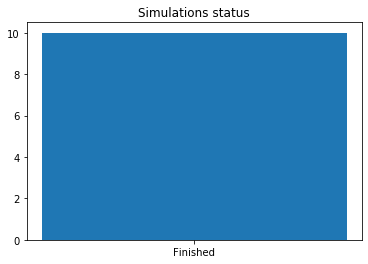

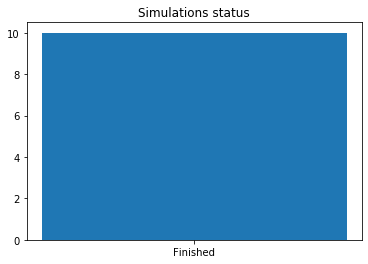

In [2]:
%matplotlib inline
import sys, os, threading, time
from collections import Counter
import matplotlib.pyplot as plt
from IPython import display

from options import STUDY_OPTIONS, MELISSA_STATS, USER_FUNCTIONS
sys.path.append('/home/bpogodzinski/Dokumenty/Melissa/melissaRepo/install/share/melissa/launcher')
from study import Study

#os.environ['PATH'] = '/home/bpogodzinski/Dokumenty/Melissa/melissaRepo/install/bin:' + os.environ.get('PATH','')
#os.environ['LD_LIBRARY_PATH'] = '/lib:/home/bpogodzinski/Dokumenty/Melissa/melissaRepo/install/lib:' + os.environ.get('LD_LIBRARY_PATH','')

melissa_study = Study(STUDY_OPTIONS, MELISSA_STATS, USER_FUNCTIONS)
thread = threading.Thread(target=melissa_study.run)

thread.start() 

while melissa_study.state_checker.running_study:
    time.sleep(0.5)
    plt.clf()
    plt.title('Simulations status')
    plt.xticks([-1,0,1,2,4], ['Not submitted', 'Waiting', 'Running', 'Finished', 'Timeout'])
    plotData = dict(Counter(map(lambda x: x.job_status, melissa_study.groups)))
    x = list(plotData.keys())
    y = list(plotData.values())
    plt.bar(x,y)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #print(f"x:{x} y:{y}")

thread.join()